### Téléchargement et installation des bibliothèques
* tensorflow
* nibabel (si nécessaire...)

In [19]:
pip install tensorflow

  Using cached absl_py-1.2.0-py3-none-any.whl (123 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached keras-2.10.0-py2.py3-none-any.whl (1.7 MB)
  Using cached tensorboard-2.10.1-py3-none-any.whl (5.9 MB)
  Using cached termcolor-2.0.1-py3-none-any.whl (5.4 kB)
  Using cached flatbuffers-22.9.24-py2.py3-none-any.whl (26 kB)
  Using cached tensorflow_estimator-2.10.0-py2.py3-none-any.whl (438 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-an

### Prétraitement d'images

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#import glob
#import nibabel as nib

from PIL import Image 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [34]:
def show_slice_window(slice, level, window):
   """
   Function to display an image slice
   Input is a numpy 2D array
   """
   max = level + window/2
   min = level - window/2
   slice = slice.clip(min,max)
   plt.figure()
   plt.imshow(slice.T, cmap="gray", origin="lower")
   plt.savefig('L'+str(level)+'W'+str(window))

def show_slice(slice):
    """
    Function to display an image slice
    Input is a numpy 2D array
    """
    plt.figure()
    plt.imshow(slice.T, cmap="gray", origin="lower")

'"\nfor c, exam_path in enumerate(paths):\n    ct_img = nib.load(exam_path)\n    ct_numpy = ct_img.get_fdata()\n    show_slice(ct_numpy)\n    if c == 3:\n      break\n'

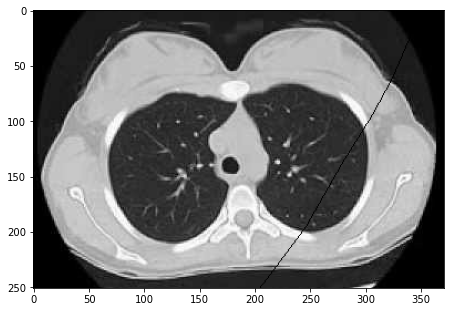

In [41]:
""""
basepath = '../Medical_Imaging/Datasets/train/normal'
paths = sorted(glob.glob(basepath))
print('Images found:', len(paths))
"""
                                                        
img = Image.open('../Medical_Imaging/Datasets/train/normal/10 (2) - Copy.png')
fig = plt.figure()
fig.set_figheight(25)
fig.set_figwidth(25)
fig.add_subplot(1,3,1)
plt.imshow(img, cmap='gray')

""""
for c, exam_path in enumerate(paths):
    ct_img = nib.load(exam_path)
    ct_numpy = ct_img.get_fdata()
    show_slice(ct_numpy)
    if c == 3:
      break
"""
#show_slice_window(img, -600, 1500)

Transformation vers le Hounsfield Unit (HU)

In [ ]:
def transform_to_hu(medical_image, image):
    intercept = medical_image.RescaleIntercept
    slope = medical_image.RescaleSlope
    hu_image = image * slope + intercept

    return hu_image

def window_image(image, window_center, window_width):
    img_min = window_center - window_width // 2
    img_max = window_center + window_width // 2
    window_image = image.copy()
    window_image[window_image < img_min] = img_min
    window_image[window_image > img_max] = img_max
    
    return window_image

Réduction de bruits

### Préparation des données d'images par classe
* **Groupes de données :** Train, Validation, Test
* **Classes :** Normal, Adenocarcinoma, Large cell carcinoma, Squamous cell carcinoma

In [36]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2,
                                  
        rotation_range=5,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        #zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255
                                  )

In [37]:
train_dataset  = train_datagen.flow_from_directory(directory = '../Medical_Imaging/Datasets/train/',
                                                   target_size = (224,224),
                                                   class_mode = 'categorical',
                                                   batch_size = 64)

Found 613 images belonging to 4 classes.


In [38]:
valid_dataset = valid_datagen.flow_from_directory(directory = '../Medical_Imaging/Datasets/valid/',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 72 images belonging to 4 classes.


In [39]:
test_dataset = test_datagen.flow_from_directory(directory = '../Medical_Imaging/Datasets/test/',
                                                  target_size = (224,224),
                                                  class_mode = 'categorical',
                                                  batch_size = 64)

Found 315 images belonging to 4 classes.
